# Project Title : Determination of Salary (Predictive Model)

#### Given Statement :
* Create a machine learning model which will help the company in determining the salary of newly hired employees using the given data. Machine learning, specifically regression, can be useful for TechWorks Consulting in determining or predicting the salary of an employee.
#### Objective :
* The objective of the study is to analyse the salary dataset obtained from “Tech Works Consulting” and to conduct various statistical hypothesis tests to get meaningful information from it. Our goal here is to understand the data as much as possible, comparing different models of regression and statistical algorithms to train the dataset and predict a continuous target variable. A thorough study of the data will aid in the discovery of valuable insights that will predict salary for employees.
#### Table of Contents :
* Reading and Understanding the Data
* Data Cleansing
* Data Visualization
* Exploratory Data Analysis
* Data Preprocessing
* Model Selection & Building
* Feature Importance
* Final Analysis

## 1.Reading and Understanding the Data
### 1.1 Importing Python Libraries
Data Handling Libraries

In [4]:
import pandas as pd                                                          #For Data_Manipulation
import numpy as np                                                           #For Data_Dimensions and other mathematical functions
import warnings                                                              #For smooth interface while running
warnings.filterwarnings('ignore')
from termcolor import colored
import matplotlib.pyplot as plt                                              #For Data_Visualization                                             
import seaborn as sns                                                        #For Advance_Visualization

Data Modelling Libraries

In [5]:
from scipy.stats import norm                                                 #For Statistical Performance
from sklearn.linear_model import LinearRegression                            #For Performing Regression 
from sklearn.linear_model import Ridge, Lasso                                #For Normalized Regression
from sklearn.tree import DecisionTreeRegressor                               #For Performing TreeRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV           #For Modelling the data
from sklearn.model_selection import cross_val_score                         
from sklearn.preprocessing import StandardScaler, MinMaxScaler               #For Normalize/Standarize the Data
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline                                        #For Clustering the function
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score                      #For Evaluating the Models Performance

### 1.2 Importing Data

In [6]:
Main_Data = pd.read_csv('C:/Users/welcome/Downloads/ML case Study.csv', header=0)
college = pd.read_csv('C:/Users/welcome/Downloads/Colleges.csv', header=0)
cities = pd.read_csv('C:/Users/welcome/Downloads/cities.csv',header=0)

In [5]:
Main_Data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [6]:
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [7]:
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


## 2.Data Cleansing
Data Joining & Manipulating

In [7]:
#Dropping 'nan' values and converted into list
Tier1 = college['Tier 1'].dropna().tolist() 
Tier2 = college['Tier 2'].dropna().tolist()
Tier3 = college['Tier 3'].dropna().tolist()
Metro_city = cities['Metrio City'].dropna().tolist()
Non_Metrocity = cities['non-metro cities'].dropna().tolist()

In [8]:
#Converting categorical data into numerical data
'''Tier1 = 1, Tier2 = 2, Tier3 = 3'''
for item in Main_Data.College:
    if item in Tier1:
        Main_Data['College'].replace(item,1,inplace=True)
    elif item in Tier2:
        Main_Data['College'].replace(item,2,inplace=True)
    elif item in Tier3:
        Main_Data['College'].replace(item,3,inplace=True)

In [9]:
#Converting categorical data into numerical data
'''Metro_city = 1,Non-Metrocity = 0'''
for item in Main_Data.City:
    if item in Metro_city:
        Main_Data['City'].replace(item,1,inplace=True)
    elif item in Non_Metrocity:
        Main_Data['City'].replace(item,0,inplace=True)

In [11]:
Main_Data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [12]:
Main_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


##### --No Missing values and null values

## 3.Data Visualization

### 3.1 FEATURES
The various features of the cleaned dataset are explained below:

| Feature                   | Description                                                                                  |
|---------------------------|----------------------------------------------------------------------------------------------|
| **College**               | Colleges are classified into Tier1, Tier2, Tier3 as 1, 2, 3                                  |
| **City**                  | Cities are classified into Metro, Non-metro cities as 1, 0                                   |
| **Role**                  | Roles are classified into Executive and Manager                                              |
| **Previous CTC**          | Salary in the previous company                                                               |
| **Previous job change**   | Job switch count numbers                                                                     |
| **Graduation Marks**      | Employees' Graduation Marks                                                                  |
| **EXP (Month)**           | Employees' experience in month count                                                         |
| **CTC**                   | Salary in this company for employees (Target Variable)                                       |

### 3.2 Features Chart Visualization

Text(0.5, 1.0, 'Roles')

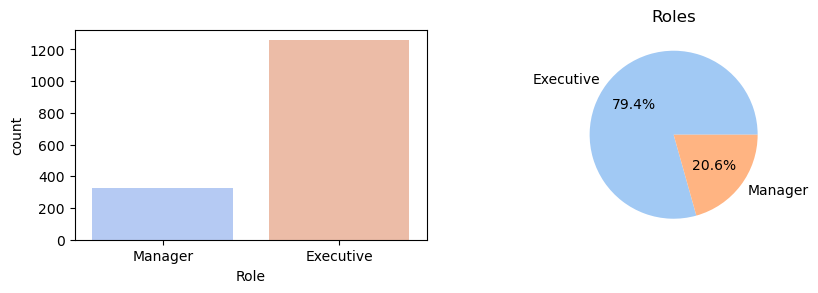

In [15]:
# Visualizations
plt.figure(figsize=(10, 6))

# Total Roles by Barchart
plt.subplot(2, 2, 1)
sns.countplot(x="Role", data=Main_Data, palette='coolwarm')

#Total Roles by Piechart
roles = Main_Data['Role'].value_counts()
plt.subplot(2, 2, 2)
plt.pie(roles, labels=roles.index, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
plt.title('Roles')

Text(0.5, 1.0, 'College_Tiers')

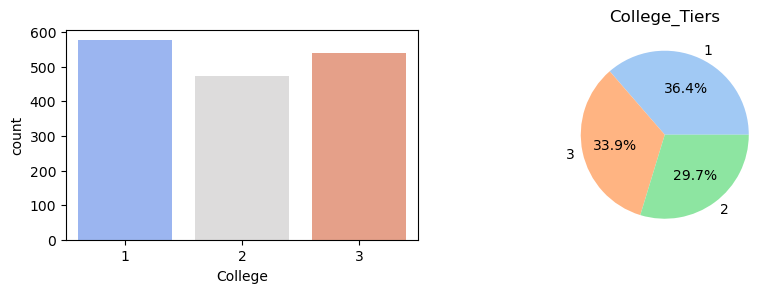

In [16]:
#Total College_Tiers by Barchart
plt.figure(figsize=(10,6))
plt.subplot(2, 2, 1)
sns.countplot(x="College", data=Main_Data, palette='coolwarm')

#Total College_Tiers by Piechart
colleges = Main_Data['College'].value_counts()
plt.subplot(2, 2, 2)
plt.pie(colleges, labels=colleges.index, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
plt.title('College_Tiers')

Text(0.5, 1.0, 'Job_switch by Count')

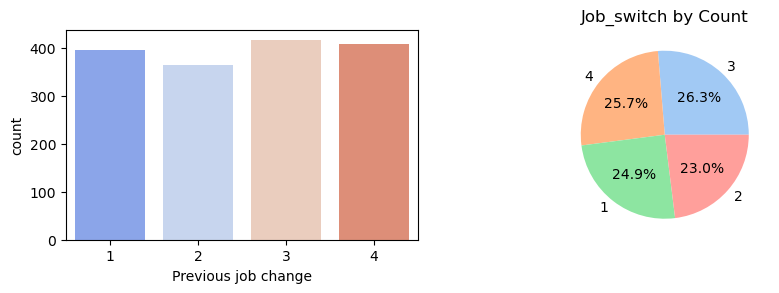

In [17]:
#Employees with Job switch counts Barchart
plt.figure(figsize=(10,6))
plt.subplot(2, 2, 1)
sns.countplot(x="Previous job change", data=Main_Data, palette='coolwarm')

#Employees with Job switch counts Piechart
Job_switch = Main_Data['Previous job change'].value_counts()
plt.subplot(2, 2, 2)
plt.pie(Job_switch, labels=Job_switch.index, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
plt.title('Job_switch by Count')

In [10]:
df = Main_Data.copy()                                                                                      #Data copied before doing someother functions

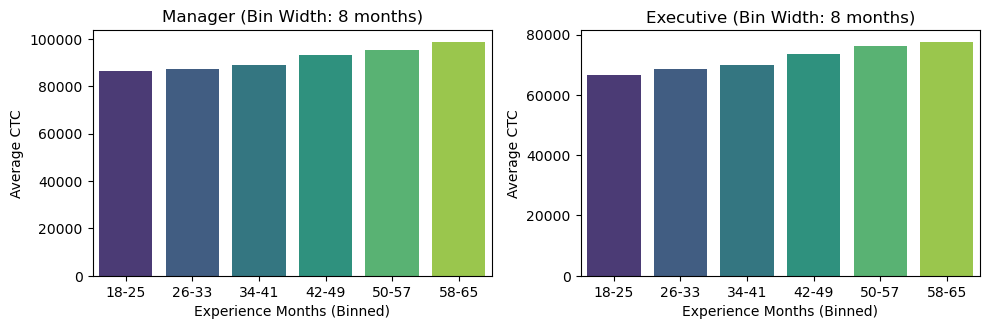

In [19]:
def plot_ctc_by_experience_role(df, bin_width):
    # Create bins
    bins = range(min(df['EXP (Month)']), max(df['EXP (Month)']) + bin_width, bin_width)
    labels = [f'{i}-{i+bin_width-1}' for i in bins[:-1]]
    
    # Copy the DataFrame and bin the data
    Binned_df = df.copy()
    Binned_df['experience_bin'] = pd.cut(Binned_df['EXP (Month)'], bins=bins, labels=labels, include_lowest=True)
    
    # List unique roles
    roles = Binned_df['Role'].unique()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 3 * len(roles)))
    
    for i, role in enumerate(roles):
        role_df = Binned_df[Binned_df['Role'] == role]
        agg_data = role_df.groupby('experience_bin').agg({'CTC': 'mean'}).reset_index()
        
        plt.subplot(len(roles), 2, i + 1)
        sns.barplot(x='experience_bin', y='CTC', data=agg_data, palette='viridis')
        
        # Add titles and labels
        plt.title(f'{role.capitalize()} (Bin Width: {bin_width} months)')
        plt.xlabel('Experience Months (Binned)')
        plt.ylabel('Average CTC')
        plt.tight_layout()
# Bin width of 8 months
plot_ctc_by_experience_role(Main_Data, 8)                                                                             #You can change your bin size here

## 4.Exploratory Data Analysis
### 4.1 Outlier Validation

In [21]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [22]:
df.describe(include = object)

,Role
count,1589
unique,2
top,Executive
freq,1261


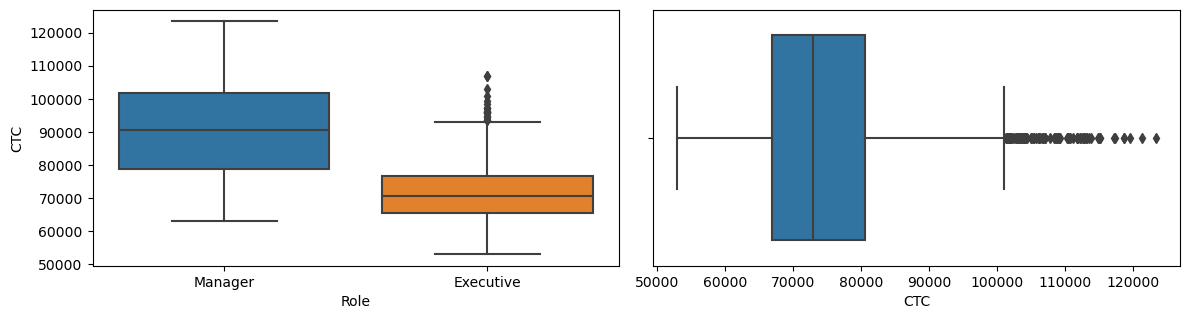

In [23]:
#Box_Plot Validation
plt.figure(figsize=(12, 6))

#Role vs CTC 
plt.subplot(2, 2, 1)
sns.boxplot(x='Role', y='CTC', data=Main_Data)

#Total CTC 
plt.subplot(2, 2, 2)
sns.boxplot(x='CTC', data=Main_Data)

plt.tight_layout()
plt.show()

##### -From this we can see some outlier in upper_limit so we can cap this outlier but basically salary is an economic data, so preprocessing it.

#### Salary Distribution Band

In [24]:
Salary = df['CTC'].values                                                                                                   # Converting CTC into Salary

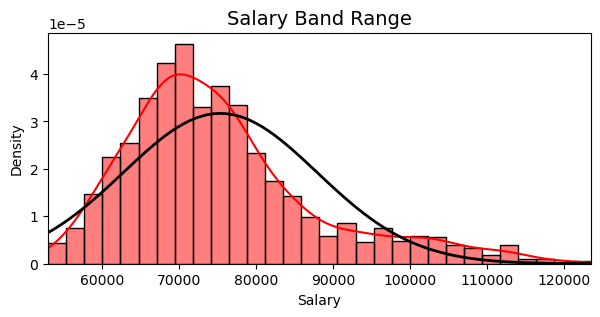

In [25]:
# Salary Dist Analysis
fig, ax = plt.subplots(figsize=(7, 3))

# Plot the distribution with a normal distribution fit
sns.histplot(Salary, kde=True, ax=ax, stat="density", color='r', bins=30)

# Fit a normal distribution and plot it
mu, std = norm.fit(Salary)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

# Add titles and labels
ax.set_title('Salary Band Range', fontsize=14)
ax.set_xlim([min(Salary), max(Salary)])
ax.set_xlabel('Salary')
ax.set_ylabel('Density')
plt.show()

##### - Distributions  
By seeing the distributions we can have an idea of how skewed are these features, and we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

### 4.2 InterQuartileRange (IQR) Method
* IQR Method: Outliers are data points that fall below Q1−1.5×IQR above Q3+1.5×IQR

In [26]:
Q1 = df['CTC'].quantile(0.25)
Q3 = df['CTC'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower_Bound:",(colored(lower_bound,'red')))
print("Upper_Bound:",(colored(upper_bound,'red')))

Lower_Bound: 46372.87000000002
Upper_Bound: 101118.15


In [27]:
lower_limit = df['CTC'].quantile(0.01)
upper_limit = df['CTC'].quantile(0.99)
print("Lower_Limit:",(colored(lower_limit,'red')))
print("Upper_Limit:",(colored(upper_limit,'red')))

Lower_Limit: 55386.704399999995
Upper_Limit: 112826.26


In [28]:
# Calculate the 99th percentile
Upper_Bound = np.percentile(df['CTC'], 99)
print(f"99th Percentile (Upper Bound): {(colored(Upper_Bound,'red'))}")

# Identify rows where 'CTC' is greater than the 99th percentile
df[df['CTC'] > Upper_Bound]

99th Percentile (Upper Bound): 112826.26


,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
34,1,0,Manager,60894.0,4,80,28,118651.89
185,2,0,Manager,70258.0,4,38,36,115126.75
254,2,1,Manager,51912.0,2,66,50,113141.14
328,3,0,Manager,62264.0,2,52,64,114996.23
543,1,1,Manager,73856.0,1,75,54,121362.73
577,3,1,Manager,59101.0,3,56,31,113843.16
668,1,1,Manager,60476.0,1,85,62,113212.07
883,3,1,Manager,64930.0,1,66,51,114939.65
1146,1,1,Manager,61709.0,4,39,60,117207.24
1230,2,0,Manager,60298.0,1,47,52,123416.99


--From this,we can see the some extreme outliers above the 1.5*IQR (It is not in the Salary Band Range)

##### Capping the Upper Bound Outliers :
* Due to salary economic data, we could not treat the outlier as per default outlier treatment
* It depends upon the need from the management requirements,may vary from company to company

In [55]:
# Cap the outliers by replacing values greater than the 99th percentile
#df['CTC'] = np.where(df['CTC'] > Upper_Bound, Upper_Bound, df['CTC'])

# Display the updated DataFrame(CTC)
#df.describe().T[['min','max']].style.background_gradient(axis=1)                                               
'''If the Outlier(Upper_bound) treatment is needed'''
#plt.figure(figsize=(12,2))
#sns.boxplot(x='CTC', data=df)

'If the Outlier(Upper_bound) treatment is needed'

### 4.3 Correlation
##### 4.3.1 Converting Categorical variable into Numerical Variable
Label Encoding for Correlation

In [13]:
#Using Pandas to convert Categorical variable to Numerical variable
Data = pd.get_dummies(df,dtype=int)

In [15]:
Data.head(2)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,0,1
1,2,0,57081.0,1,84,18,68005.87,1,0


In [31]:
Data.corr().style.format(precision=3).background_gradient(axis=1)                                                    #Adjust your precision for accuracy

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
College,1.000,-0.015,0.042,-0.055,0.004,0.012,-0.030,0.015,-0.015
City,-0.015,1.000,0.005,0.052,-0.019,-0.024,-0.020,0.049,-0.049
Previous CTC,0.042,0.005,1.000,0.006,-0.033,0.119,0.258,-0.012,0.012
Previous job change,-0.055,0.052,0.006,1.000,0.019,0.023,0.011,0.017,-0.017
Graduation Marks,0.004,-0.019,-0.033,0.019,1.000,-0.057,-0.005,-0.018,0.018
EXP (Month),0.012,-0.024,0.119,0.023,-0.057,1.000,0.301,0.027,-0.027
CTC,-0.030,-0.020,0.258,0.011,-0.005,0.301,1.000,-0.621,0.621
Role_Executive,0.015,0.049,-0.012,0.017,-0.018,0.027,-0.621,1.000,-1.000
Role_Manager,-0.015,-0.049,0.012,-0.017,0.018,-0.027,0.621,-1.000,1.000


## Key Takeaways :
* Experience and CTC : More experience generally leads to higher previous and current salaries.
* Role and CTC : Managers tend to have higher salaries compared to executives.
* Education and Location : College and city have minimal impact on salary and job roles.

## 5.Data Preprocessing
### 5.1 Defining Features and Target Variables

In [16]:
X = Data.loc[:, Data.columns!='CTC']
y = Data['CTC']
print("Original set --->",'X:', X.shape,'y:', y.shape)                                                              #X=Independant,y=Dependant Variables

Original set ---> X: (1589, 8) y: (1589,)


### 5.2 Train Test Splitting 

In [17]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print('Shape of training Feature:',(colored(X_train.shape, 'red')))
print('Shape of testing Feature:',(colored(X_test.shape, 'red')))
print('Shape of training Target:',(colored(y_train.shape, 'red')))
print('Shape of testing Target:', (colored(y_test.shape, 'red')))

Shape of training Feature: (1271, 8)
Shape of testing Feature: (318, 8)
Shape of training Target: (1271,)
Shape of testing Target: (318,)


### 5.3 Normalization
StandardScaler/MinMaxScaler/RobustScaler 

In [39]:
# Preprocess data
scaler = StandardScaler()#MinMaxScaler()#RobustScaler()                                                                                #ALter the Scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

-- *******Scaling using scaler is not much used in this data******* 

## 6.Model Buliding 
### 6.1 Model Selection

In [18]:
# Preferred ML Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()}

In [19]:
# Function to evaluate model performance
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return rmse, r2_square

# Initialize an empty list to store results
results = []

# Loop through each model
for model_name, model in models.items():
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Append results to list
    results.append({
        'Model': model_name,
        'Train RMSE': model_train_rmse,
        'Train R2': model_train_r2,
        'Test RMSE': model_test_rmse,
        'Test R2': model_test_r2})

### 6.2 Model Evaluation

In [50]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df.head(10).style.format(precision=3).background_gradient(axis=1)

,Model,Train RMSE,Train R2,Test RMSE,Test R2
0,Linear Regression,8725.774,0.530,8028.400,0.553
1,Lasso,8725.775,0.530,8028.116,0.553
2,Ridge,8725.795,0.530,8027.190,0.553
3,Decision Tree,0.000,1.000,9935.735,0.315
4,Random Forest Regressor,2878.441,0.949,6908.812,0.669
5,XGBRegressor,1353.390,0.989,7488.807,0.611
6,GradientBoostingRegressor,6802.777,0.714,7014.175,0.658
7,AdaBoost Regressor,8041.398,0.601,7673.851,0.591


Inference : Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores.

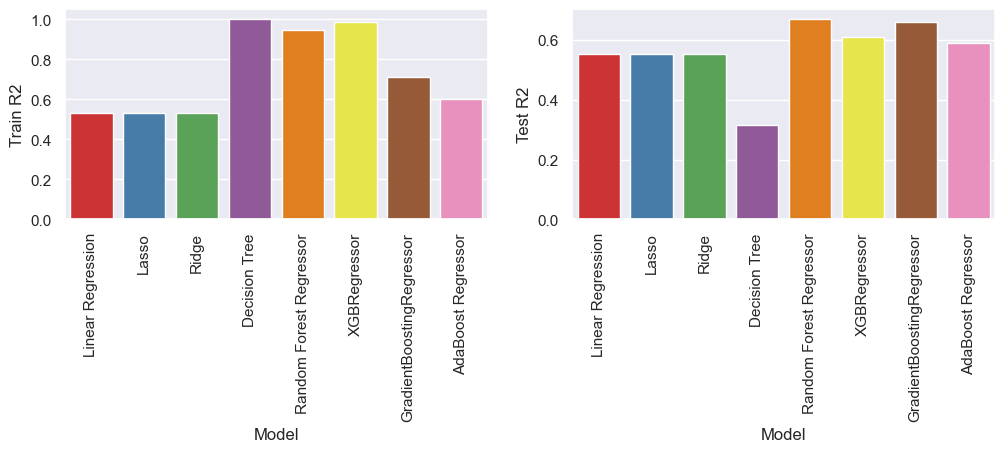

In [74]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Train R2', data=results_df, palette="Set1")
plt.xticks(rotation=90)
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Test R2', data=results_df, palette="Set1")
plt.xticks(rotation=90)

plt.tight_layout
plt.show()

### 6.3 Model Analysis

| Model name                   | Analysis |
|-----------------------------|-------------------------------------------------------------------------------------------------|
| **Linear Regression**       | The performance on train and test data is quite similar. This model is likely underfitting as the R² values are moderate, indicating it might be too simple. |
| **Lasso**                   | Similar to linear regression, with no significant discrepancy between train and test performance. Likely underfitting. |
| **Ridge**                   | Again, very similar train and test performance, indicating underfitting. |
| **Decision Tree**           | Perfect fit on training data but poor performance on test data. This model is clearly overfitting. |
| **Random Forest Regressor** | Good performance on both train and test data with some discrepancy. This model is neither clearly underfitting nor overfitting but shows slight overfitting. |
| **XGBRegressor**            | Excellent performance on training data but relatively worse on test data. Indicates overfitting.|
| **GradientBoostingRegressor**| Moderate train and test performance with slight discrepancy. Neither clearly underfitting nor overfitting, but a good balance.|
| **AdaBoost Regressor**      | Similar train and test performance. Likely underfitting.|

#### Summary :
*  ***Underfitting Models*** : Linear Regression, Lasso, Ridge, AdaBoost Regressor.
*  ***Overfitting Models*** : Decision Tree, XGBRegressor.
*  ***Well-Balanced Model***  : Random Forest Regressor (slight overfitting), GradientBoostingRegressor.

### 6.4 Model Hyperparameter Tuning
GradientBoosting Regressor

###### ''While Running down this code, make sure it takes a lot time to evalute, So I printed values of best_parameters''

In [81]:
# Define the parameter grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_gbr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best estimator
y_train_pred = best_gbr.predict(X_train)
y_test_pred = best_gbr.predict(X_test)

model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print(f'Train RMSE: {model_train_rmse}, Train R^2: {model_train_r2}')
print(f'Test RMSE: {model_test_rmse}, Test R^2: {model_test_r2}')

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
Train RMSE: 6267.437616296419, Train R^2: 0.7573848189662217
Test RMSE: 6983.944229211659, Test R^2: 0.6613748290736379


## 7.Feature Importance

In [80]:
#Define function for (grb)Model preferred Features
def plot_importance(model, features, num=6, save=False, title='Feature Importances'):                                            #Alter the feature nos 
    if hasattr(model, 'feature_importances_'):
        feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
        plt.figure(figsize=(10, 4))
        sns.set(font_scale=1)
        sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(num),palette="Set1")
        plt.title(title)
        plt.tight_layout()
        plt.show()
    else:
        raise AttributeError("The model does not have the attribute 'feature_importances_'")

Plotting Feature Importance

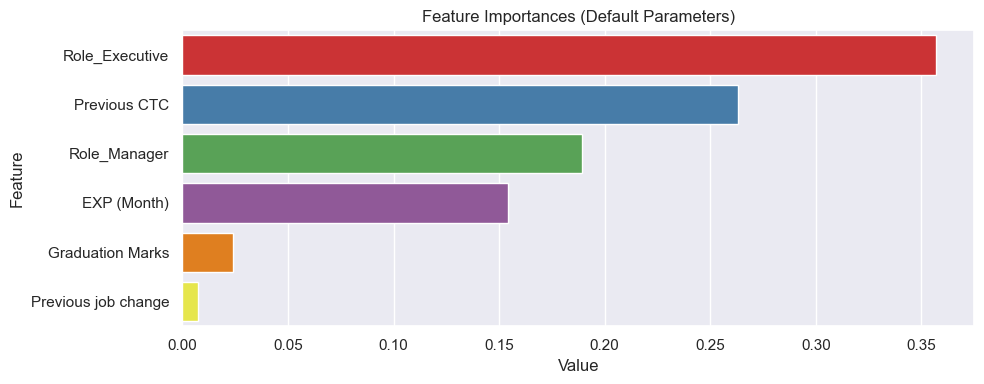

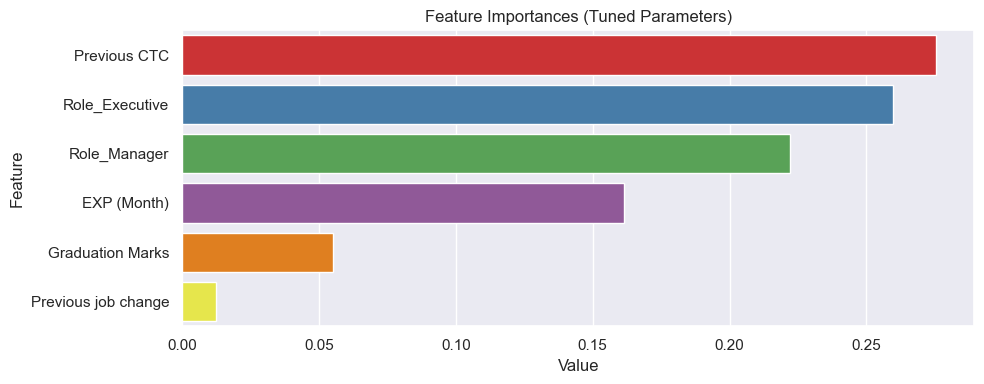

In [78]:
# Train model with default parameters
default_model = GradientBoostingRegressor()
default_model.fit(X_train, y_train)

# Train model with hyperparameter tuning
tuned_model = GradientBoostingRegressor(
    learning_rate=0.01,
    max_depth=5,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    subsample=0.8
)
tuned_model.fit(X_train, y_train)

# Plot feature importances for the default model
plot_importance(default_model, X_train, title='Feature Importances (Default Parameters)')

# Plot feature importances for the hyperparameter tuned model
plot_importance(tuned_model, X_train, title='Feature Importances (Tuned Parameters)')

## 8. Final Analysis

### 8.1 Predictions 

Getting Values by User

In [25]:
#Predicting Salary using GradientBoostingRegressor Model
def get_user_input_and_predict(model):
    try:
        # Get inputs from the user
        feature_1 = int(input("Enter College (1 for Tier1, 2 for Tier2, 3 for Tier3): "))
        feature_2 = int(input("Enter City (1 for Metro_city, 2 for Non-metro city): "))
        feature_3 = float(input("Enter Previous CTC: "))
        feature_4 = int(input("Enter Previous Job-switch count: "))
        feature_5 = int(input("Enter Graduation Marks: "))
        feature_6 = int(input("Enter Experience(in Month): "))
        feature_7 = int(input("Enter Role for Executive(1 for Yes,0 for No): "))
        feature_8 = int(input("Enter Role for Manager(1 for Yes,0 for No): "))
        
        # Combine inputs into a list
        new_employee = [[feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7,feature_8]]
        
        # Make prediction
        predicted_salary = model.predict(new_employee)
        
        # Print the prediction
        print(("College,City,Previous CTC,Previous Job-switch count,Graduation Marks,EXP(Month),Role Executive,Role Manager:"),
              new_employee)
        print('Predicted salary:', predicted_salary[0])
    except ValueError:
        print("Invalid input. Please enter the correct type of values for each feature.")

#Model Assuming for Predictions
model =model = GradientBoostingRegressor(learning_rate=0.01,max_depth=5,max_features='auto',
                                  min_samples_leaf=2,min_samples_split=2,n_estimators=300,subsample=0.8)
model.fit(X_train, y_train)
get_user_input_and_predict(model)

Enter College (1 for Tier1, 2 for Tier2, 3 for Tier3):  1
Enter City (1 for Metro_city, 2 for Non-metro city):  1
Enter Previous CTC:  50000
Enter Previous Job-switch count:  3
Enter Graduation Marks:  66
Enter Experience(in Month):  18
Enter Role for Executive(1 for Yes,0 for No):  1
Enter Role for Manager(1 for Yes,0 for No):  0


College,City,Previous CTC,Previous Job-switch count,Graduation Marks,EXP(Month),Role Executive,Role Manager: [[1, 1, 50000.0, 3, 66, 18, 1, 0]]
Predicted salary: 66993.6269640494


# Conclusion :

##### Here are some of the key outcomes of the project:
* The Dataset was quiet small with just 1589 samples & salary with unadjusted band range.
* Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
* Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
* It is moderate safe to use ***Gradientboosting regressor algorithm***, which performed better than other algorithms, as their scores were quiet comparable & also they're more generalisable.

# Thank You

##### Questions to Evalute :
1. Your views about the problem statement?
3. What will be your approach to solving this task?
4. What were the available ML model options you had to perform this task?
5. Which model’s performance is best and what could be the possible reason for that?
6. What steps can you take to improve this selected model’s performance even further?

##### Preferrable Answers :
1. The objective of the study is to analyse the salary dataset obtained from “Tech Works Consulting” and to conduct various statistical hypothesis tests to get meaningful information from it. Our goal here is to understand the data as much as possible, comparing different models of regression and statistical algorithms to train the dataset and predict a continuous target variable. A thorough study of the data will aid in the discovery of valuable insights that will predict salary for employees.
2. My approach would be using Regression Machine learning algorthims to evalute the datas with proper structured analysis by python frameworks and libraries. With clear visualization of datas, we can get some idea to working on it. (Everything evaluted and visualized above)
3. Linear Regression, Lasso, Ridge, DecisionTree, XGBRegressor, RandomForestRegressor, GradientBoostingRegressor and AdaBoostRegressor.(My preference)
4. The GradientBoostingRegressor strikes a good balance between capturing the complexity of the data (reducing bias) and avoiding overfitting (reducing variance). Its balanced performance on both training and testing datasets.
5. By Hyperparameter Tuning especially using gridsearchcv to get multiple combination of parameters to get a balanced performance with lowest rmse value and difference gap between train r2score and testr2 score. 